In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/heart disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df = df.iloc[:, [13,0,1,2,3,4,5,6,7,8,9,10,11,12]]

target          AxesSubplot(0.125,0.71587;0.168478x0.16413)
age          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
trestbps       AxesSubplot(0.125,0.518913;0.168478x0.16413)
chol        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
thalach        AxesSubplot(0.125,0.321957;0.168478x0.16413)
exang       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
ca                AxesSubplot(0.125,0.125;0.168478x0.16413)
thal           AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

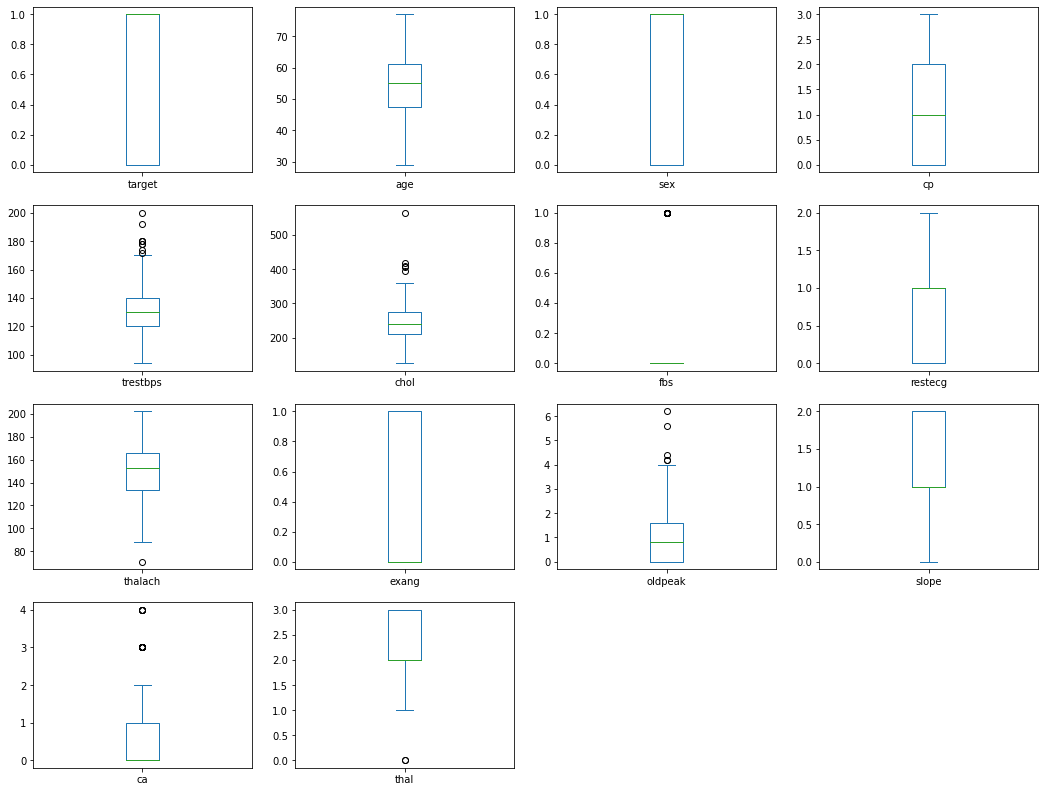

In [8]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(18,14))

In [9]:
# first Column
iqr = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
iqr

20.0

In [10]:
lower_limit = df['trestbps'].quantile(0.25) - 1.5*(iqr)
lower_limit

90.0

In [11]:
upper_limit = df['trestbps'].quantile(0.75) + 1.5*(iqr)
upper_limit

170.0

In [12]:
df['trestbps'] = np.where(df['trestbps'] > upper_limit, upper_limit, np.where(df['trestbps'] < lower_limit, lower_limit, df['trestbps']))

In [13]:
# Second Column
iqr = df['chol'].quantile(0.75) - df['chol'].quantile(0.25)
iqr

63.5

In [14]:
lower_limit = df['chol'].quantile(0.25) - 1.5*(iqr)
lower_limit

115.75

In [15]:
upper_limit = df['chol'].quantile(0.75) + 1.5*(iqr)
upper_limit

369.75

In [16]:
df['chol'] = np.where(df['chol'] > upper_limit, upper_limit, np.where(df['chol'] < lower_limit, lower_limit, df['chol']))

In [17]:
# Third Column
iqr = df['thalach'].quantile(0.75) - df['thalach'].quantile(0.25)
iqr

32.5

In [18]:
lower_limit = df['thalach'].quantile(0.25) - 1.5*(iqr)
lower_limit

84.75

In [19]:
upper_limit = df['thalach'].quantile(0.75) + 1.5*(iqr)
upper_limit

214.75

In [20]:
df['thalach'] = np.where(df['thalach'] > upper_limit, upper_limit, np.where(df['thalach'] < lower_limit, lower_limit, df['thalach']))

In [21]:
# Forth Column
iqr = df['oldpeak'].quantile(0.75) - df['oldpeak'].quantile(0.25)
iqr

1.6

In [22]:
lower_limit = df['oldpeak'].quantile(0.25) - 1.5*(iqr)
lower_limit

-2.4000000000000004

In [23]:
upper_limit = df['oldpeak'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.0

In [24]:
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit, np.where(df['oldpeak'] < lower_limit, lower_limit, df['oldpeak']))

In [25]:
# Fifth Column
iqr = df['ca'].quantile(0.75) - df['ca'].quantile(0.25)
iqr

1.0

In [26]:
lower_limit = df['ca'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.5

In [27]:
upper_limit = df['ca'].quantile(0.75) + 1.5*(iqr)
upper_limit

2.5

In [28]:
df['ca'] = np.where(df['ca'] > upper_limit, upper_limit, np.where(df['ca'] < lower_limit, lower_limit, df['ca']))

In [29]:
# Sixth Column
iqr = df['thal'].quantile(0.75) - df['thal'].quantile(0.25)
iqr

1.0

In [30]:
lower_limit = df['thal'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.5

In [31]:
upper_limit = df['thal'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.5

In [32]:
df['thal'] = np.where(df['thal'] > upper_limit, upper_limit, np.where(df['thal'] < lower_limit, lower_limit, df['thal']))

In [33]:
# Seven Column
iqr = df['fbs'].quantile(0.75) - df['fbs'].quantile(0.25)
iqr

0.0

In [34]:
lower_limit = df['fbs'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.0

In [35]:
upper_limit = df['fbs'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.0

In [36]:
df['fbs'] = np.where(df['fbs'] > upper_limit, upper_limit, np.where(df['fbs'] < lower_limit, lower_limit, df['fbs']))

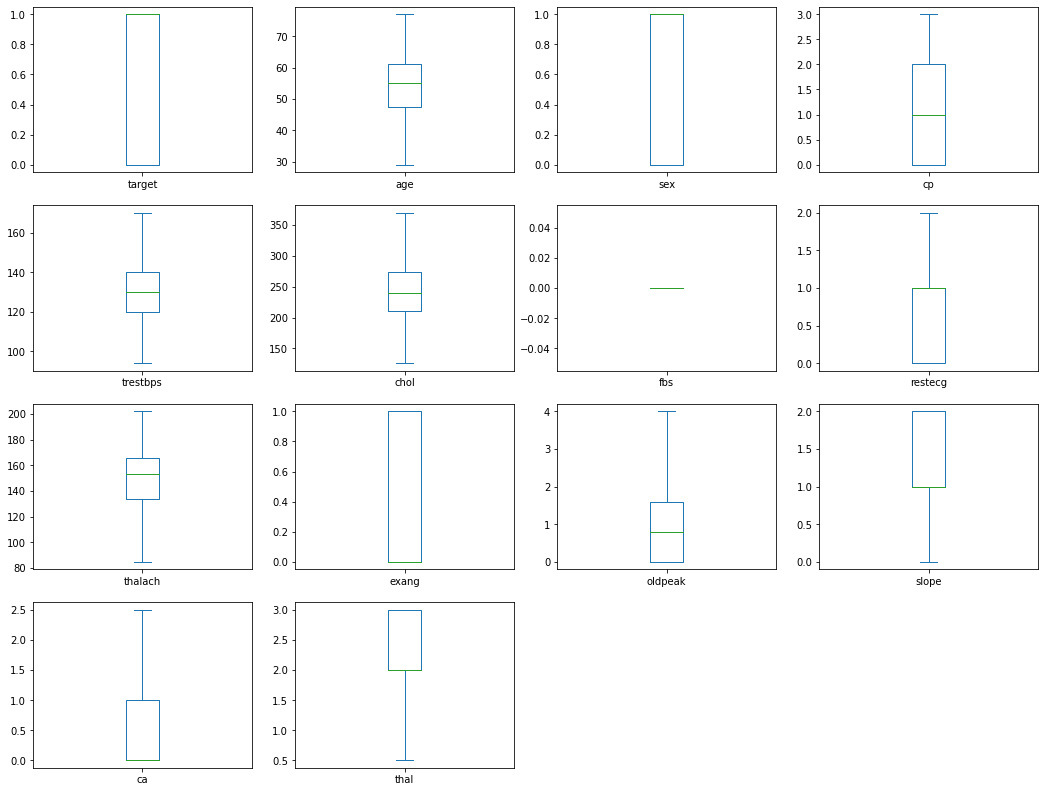

In [37]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(18,14));

# spliting the data 

In [38]:
x = df.iloc[:, [0,2,3,6,7,9,11,12,13]]

In [39]:
y = df.iloc[:, [1,4,5,8,10]]

In [40]:
y

,age,trestbps,chol,thalach,oldpeak
0,63,145.0,233.0,150.0,2.3
1,37,130.0,250.0,187.0,3.5
2,41,130.0,204.0,172.0,1.4
3,56,120.0,236.0,178.0,0.8
4,57,120.0,354.0,163.0,0.6
...,...,...,...,...,...
298,57,140.0,241.0,123.0,0.2
299,45,110.0,264.0,132.0,1.2
300,68,144.0,193.0,141.0,3.4
301,57,130.0,131.0,115.0,1.2


# Normalization

In [41]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [42]:
y_norm = norm_func(y)

In [43]:
y_norm

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.671053,0.438974,0.556503,0.575
1,0.166667,0.473684,0.508718,0.872068,0.875
2,0.250000,0.473684,0.320000,0.744136,0.350
3,0.562500,0.342105,0.451282,0.795309,0.200
4,0.583333,0.342105,0.935385,0.667377,0.150
...,...,...,...,...,...
298,0.583333,0.605263,0.471795,0.326226,0.050
299,0.333333,0.210526,0.566154,0.402985,0.300
300,0.812500,0.657895,0.274872,0.479744,0.850
301,0.583333,0.473684,0.020513,0.257996,0.300


# Joining data after Normalization

In [44]:
xy = pd.concat([x, y_norm], axis=1)

In [45]:
xy

,target,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak
0,1,1,3,0.0,0,0,0,0.0,1.0,0.708333,0.671053,0.438974,0.556503,0.575
1,1,1,2,0.0,1,0,0,0.0,2.0,0.166667,0.473684,0.508718,0.872068,0.875
2,1,0,1,0.0,0,0,2,0.0,2.0,0.250000,0.473684,0.320000,0.744136,0.350
3,1,1,1,0.0,1,0,2,0.0,2.0,0.562500,0.342105,0.451282,0.795309,0.200
4,1,0,0,0.0,1,1,2,0.0,2.0,0.583333,0.342105,0.935385,0.667377,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0.0,1,1,1,0.0,3.0,0.583333,0.605263,0.471795,0.326226,0.050
299,0,1,3,0.0,1,0,1,0.0,3.0,0.333333,0.210526,0.566154,0.402985,0.300
300,0,1,0,0.0,1,0,1,2.0,3.0,0.812500,0.657895,0.274872,0.479744,0.850
301,0,1,0,0.0,1,1,1,1.0,3.0,0.583333,0.473684,0.020513,0.257996,0.300


# linkage and Dendrogram

In [46]:
z = linkage(xy, method='complete', metric='euclidean')

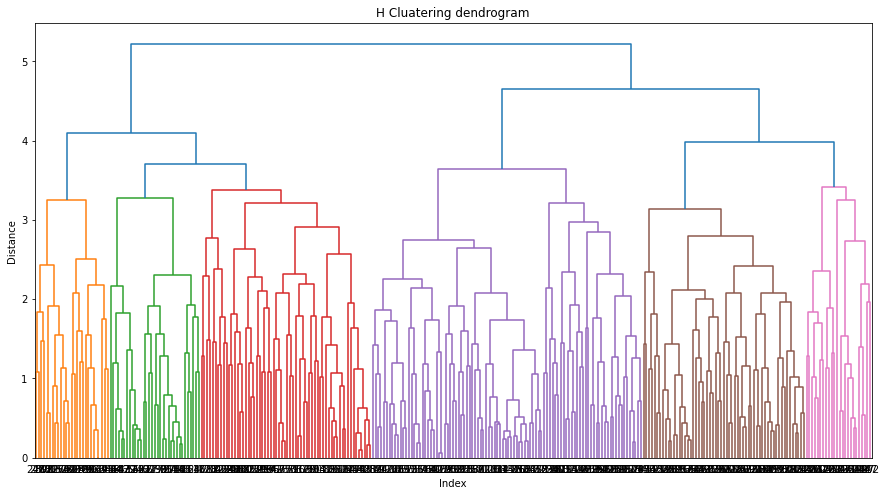

In [47]:
plt.figure(figsize=(15,8));plt.title('H Cluatering dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

In [50]:
s = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit(xy)
s.labels_

array([0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1,

In [51]:
c_l = pd.Series(s.labels_)

In [52]:
df['Clust'] = c_l

In [53]:
df

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Clust
0,1,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,0
1,1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,0
2,1,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,2
3,1,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,2
4,1,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,2
299,0,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,0,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,1
301,0,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,1


In [54]:
df = df.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [55]:
df

,Clust,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,1,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,0,1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,2,1,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,2,1,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,2,1,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,0,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,0,0,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
300,1,0,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0
301,1,0,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


In [56]:
df.iloc[:, 2:].groupby(df.Clust).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Clust,,,,,,,,,,,,,
0,54.229508,0.622951,2.090164,132.786885,241.995902,0.0,0.508197,156.418033,0.147541,0.874590,1.459016,0.508197,2.209016
1,58.722892,0.807229,0.084337,131.759036,252.319277,0.0,0.445783,136.469880,0.578313,1.545783,1.228916,1.680723,2.530120
2,50.846939,0.653061,0.316327,129.000000,242.956633,0.0,0.622449,152.517857,0.336735,0.769388,1.469388,0.020408,2.270408


In [57]:
df.iloc[:, 2:].groupby(df.Clust).median()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Clust,,,,,,,,,,,,,
0,54.0,1.0,2.0,130.0,235.5,0.0,0.5,159.0,0.0,0.6,2.0,0.0,2.0
1,59.0,1.0,0.0,130.0,254.0,0.0,0.0,141.0,1.0,1.4,1.0,2.0,3.0
2,51.0,1.0,0.0,128.0,236.5,0.0,1.0,156.0,0.0,0.4,2.0,0.0,2.0


In [58]:
df.iloc[:, 2:].groupby(df.Clust).std()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Clust,,,,,,,,,,,,,
0,9.332062,0.486646,0.530150,16.866138,45.651041,0.0,0.518196,19.462547,0.356107,0.982539,0.618550,0.784624,0.513617
1,6.743223,0.396873,0.279582,17.454184,48.128469,0.0,0.523893,22.356500,0.496831,1.255942,0.548286,0.612762,0.668769
2,8.997539,0.478443,0.467433,15.342818,49.204850,0.0,0.527888,22.438526,0.475023,0.986236,0.645429,0.142119,0.601409
